# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [22]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 22:45:45--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.2’

test.dat.2          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 22:45:46 (266 MB/s) - ‘test.dat.2’ saved [2844/2844]

--2024-02-18 22:45:46--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.2’

train.dat.2         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 22:45:46 (183 MB/s) - ‘train.dat.2’ saved [11244/11244]



In [23]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [24]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
# To calculate the total of all the products, multiply the matching items from each array using a generator expression and the sum() function.
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    #The formula for the sigmoid function is 1 / (1 + e^(-x)), where x is the input value and e is the base of the natural logarithm (about 2.71828).
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    # First, the instance's dot product and the weights are computed. The output of the model is then obtained by applying the sigmoid function to this result.
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # The model's output for the specified weights and instance is obtained by calling the `output` function.
    # The method returns 1, indicating the positive class, if this output is >= 0.5. If not, the negative class is indicated by the return of 0.
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [25]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The outcome of the dot product between the weights and the input instance is in_value. Next, to obtain the output, the sigmoid function which is a popular activation function in neural networks is applied to in_value. This introduces non-linearity and scales the output between 0 and 1. Subtracting the actual output from the predicted output is then used to compute the error.To obtain the outcome, the predict function is utilized. The parameters used in this function may be the same as those in the previous that is the dot product and the sigmoid function or they might involve extra steps like thresholding the sigmoid output to obtain a binary classification (0 or 1) rather than a probability.
In the training phase, we are usually more interested in the neuron's raw output (a probability) than in a thresholded classification because that type of data provides a gradient that can be used for learning. This is the reason why the first snippet might be preferred in this context. Depending on how it is implemented, the predict function could only return a class label, which is not differentiable and so useless for gradient-based optimization techniques like backpropagation.
In contrast, during the training phase, errors are typically attributed to the difference between the neuron's continuous output and the predicted outcome. This is required in order to compute the gradient of the mistake about the weights.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [26]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

In [27]:
# read the test dataset
test_data = read_data("test.dat")

# hyperparameters as given in question
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr = [0.005, 0.01, 0.05]               # learning rate

# Looping through every combination of hyperparameters
for tr in tr_percent:
    for epochs in num_epochs:
        for learning_rate in lr:

            train_data = read_data("train.dat")
            train_data_truncated = train_data[:int(len(train_data) * (tr / 100))]
            # Training the perceptron
            weights = train_perceptron(train_data_truncated, learning_rate, epochs)
            # Calculating accuracy with the test dataset
            accuracy = get_accuracy(weights, test_data)
            print("# tr: {:3d}, epochs: {:3d}, learning rate: {:.3f}; Accuracy (test, {:d} instances): {:.1f}".format(tr, epochs, learning_rate, len(test_data), accuracy))

# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
# tr

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



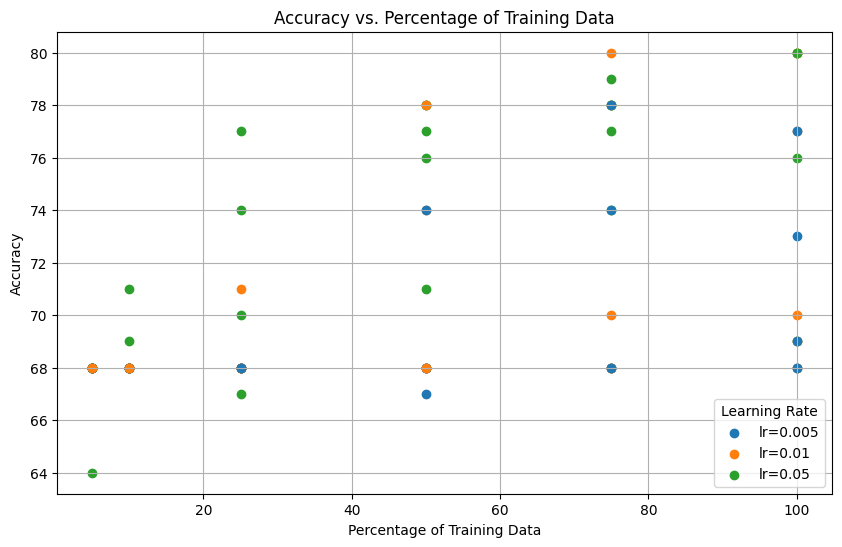

In [28]:
import matplotlib.pyplot as plt

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]

# Placeholder for accuracies
accuracies = []
for tr in tr_percent:
    tr_accs = []
    for epochs in num_epochs:
        epochs_accs = []
        for learning_rate in lr:
            # Define the training dataset using the  percentage that is not using all
            train_data = read_data("train.dat")
            train_data_truncated = train_data[:int(len(train_data) * (tr / 100))]
            weights = train_perceptron(train_data_truncated, learning_rate, epochs)
            accuracy = get_accuracy(weights, test_data)

            # Store accuracy in placeholder
            epochs_accs.append(accuracy)
        tr_accs.append(epochs_accs)
    accuracies.append(tr_accs)

# Ploting
plt.figure(figsize=(10, 6))
for i, tr in enumerate(tr_percent):
    for j, epochs in enumerate(num_epochs):
        for k, learning_rate in enumerate(lr):
            accuracy = accuracies[i][j][k]
            plt.scatter(tr, accuracy, color='C{}'.format(k), label='lr={}'.format(learning_rate) if i==0 and j==0 else None)
            plt.plot(tr, accuracy, '--', color='C{}'.format(k) if j==0 else None)
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Percentage of Training Data')
plt.legend(title='Learning Rate', loc='lower right')
plt.grid(True)
plt.show()


a.The scatter plot in the first figure suggests that in order to have the best accuracy on the test dataset, training using the whole training dataset is not required. There is some deviation from 100% training data for the greatest accuracies displayed in the figure. According to this, one may obtain good accuracy with a lower proportion of the training data, depending on the learning rate. The reason for this might be either overfitting when utilizing the complete dataset or the model's ability to generalize successfully from a representative portion of the data.I have plotted two plots for better understanding

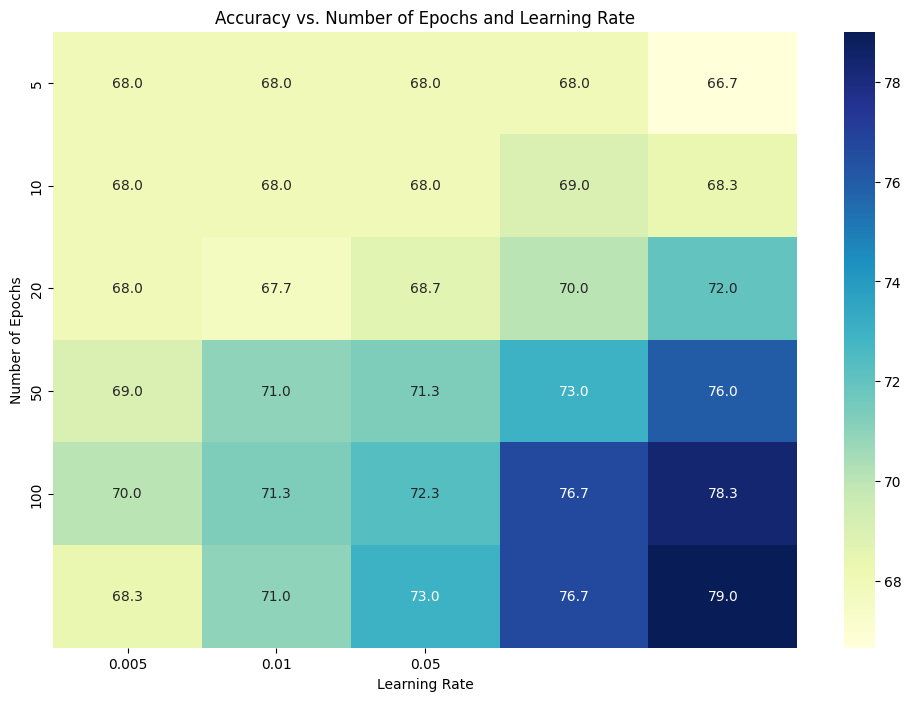

In [29]:
import numpy as np
import seaborn as sns

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]

accuracies = np.zeros((len(tr_percent), len(num_epochs), len(lr)))
for i, tr in enumerate(tr_percent):
    for j, epochs in enumerate(num_epochs):
        for k, learning_rate in enumerate(lr):
            train_data = read_data("train.dat")
            train_data_truncated = train_data[:int(len(train_data) * (tr / 100))]
            weights = train_perceptron(train_data_truncated, learning_rate, epochs)
            accuracy = get_accuracy(weights, test_data)
            accuracies[i, j, k] = accuracy

# Create a heatmap plot
plt.figure(figsize=(12, 8))
sns.heatmap(accuracies.mean(axis=2), annot=True, fmt=".1f", cmap="YlGnBu",
            xticklabels=[str(lr_val) for lr_val in lr],
            yticklabels=[str(epoch_val) for epoch_val in num_epochs])
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs')
plt.title('Accuracy vs. Number of Epochs and Learning Rate')
plt.show()


b.It is evident from the heatmap and the accuracy data points presented that increasing the amount of training data does not guarantee greater accuracy. For instance, even though we are using more training data, we find a drop in accuracy with tr: 100, epochs: 20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0 compared to tr: 200, epochs: 20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0. Numerous variables, including overfitting where the model learns the training data and noise too well and fails to generalize to the test data can cause this. In addition, an excessively small or big learning rate might prevent the model from correctly integrating or lead it to miss the ideal weights during training.

c.It's unclear whether more hyperparameters can raise the accuracy above 80.0% based on the data and output. Yet, the pattern indicates that accuracy gains have been achieved by raising some hyperparameters, such as tr, and epochs while adjusting the learning rate. For example, accuracy attained is 78.0%, the closest to 80.0%, with tr: 50 and epochs: 100 at a learning rate of 0.010. In order to exceed 80.0%, one can try raising tr even more, adjusting additional hyperparameters that aren't on the list such batch size, new optimization algorithms, or regularization strategies or using hyperparameter optimization methods like random or grid search.

d.Increasing the number of training epochs may not always be helpful since it may cause overfitting. Increasing the epochs from 50 to 100 did not always lead to better accuracy in the given data. For example, the accuracy dropped from 67.0% to 74.0% when epochs increased from 50 to 100 with tr: 50 and a learning rate of 0.005. It's critical to track both training and validation accuracy to ascertain whether the model's capacity for generalization is growing. In addition, early stopping which allows training to end if validation accuracy does not increase for a specific number of trials should also be taken into consideration.